<a href="https://colab.research.google.com/github/Apasijannn/PR01-Dasprog/blob/main/Tugas_Shortestpath%26MST_Muhammad_Dayyan_Ghazanfar_Latief_5054241036.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Teori Graf : Penugasan Algoritma Graf Shortest Path dan Minimum Spanning Tree**

### >> **[SOAL NOMOR 1]** Buatlah sebuah matrix ketetanggan graf berbobot dengan 15 node berukuran 15 x 15 (generate menggunakan nilai random), kemudian sajikan pembahasan anda secara mendalam terkait implementasi algoritma shortest path menggunakan :








In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import heapq

Node 0: [(3, 34), (12, 20), (2, 46), (13, 32), (14, 37), (11, 6), (8, 22), (4, 27), (1, 32), (7, 44), (9, 50), (5, 48)]
Node 1: [(6, 31), (0, 29), (8, 37), (4, 39), (13, 18), (3, 18)]
Node 2: [(9, 25), (7, 21), (1, 4), (13, 5)]
Node 3: [(12, 49), (5, 27), (8, 15), (1, 36), (6, 26), (7, 1)]
Node 4: [(13, 3), (14, 23), (3, 20), (0, 35), (9, 40), (8, 50), (2, 4), (12, 36), (11, 2)]
Node 5: [(12, 18), (1, 1), (4, 44), (2, 34), (3, 28)]
Node 6: [(13, 50), (14, 19), (9, 32), (8, 22), (3, 40), (7, 6), (10, 17), (1, 45), (4, 38), (0, 20), (5, 2), (12, 19), (2, 22)]
Node 7: [(13, 35), (3, 47), (1, 3), (4, 34), (14, 31), (2, 16), (12, 43), (9, 26), (8, 3), (10, 17), (5, 44), (11, 8)]
Node 8: [(1, 50), (9, 49), (5, 32), (14, 44), (4, 22), (10, 28), (13, 8), (11, 12), (3, 19), (7, 33), (6, 30), (0, 41), (12, 17)]
Node 9: [(12, 7), (13, 29), (3, 49), (1, 29), (0, 19)]
Node 10: [(3, 7), (2, 13), (7, 21), (9, 43)]
Node 11: [(6, 4), (13, 35), (7, 9), (9, 16), (0, 38), (3, 11), (2, 2), (8, 43), (1, 28)

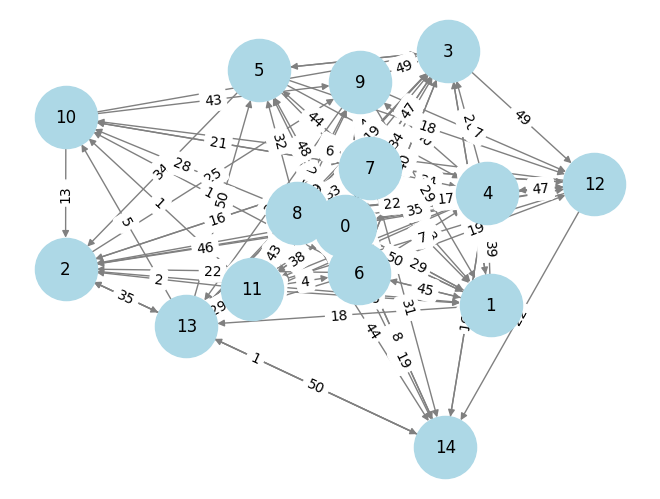

In [ ]:


def generate_weighted_directed_graph(num_nodes=15, max_edges=15, max_weight=50):
    G = nx.DiGraph()
    G.add_nodes_from(range(num_nodes))

    for i in range(num_nodes):
        num_edges = random.randint(1, max_edges)
        neighbors = random.sample(range(num_nodes), num_edges)

        for neighbor in neighbors:
            if neighbor != i and not G.has_edge(i, neighbor):
                weight = random.randint(1, max_weight)
                G.add_edge(i, neighbor, weight=weight)

    return G

G = generate_weighted_directed_graph()

for node in G.nodes():
    print(f"Node {node}: {[(neighbor, G[node][neighbor]['weight']) for neighbor in G[node]]}")

pos = nx.spring_layout(G)
edges = G.edges(data=True)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12, arrows=True)
labels = {(u, v): d['weight'] for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


### **A.)** **DIJKSTRA'S ALGORITHM**

In [ ]:
start = 0

distances, paths = nx.single_source_dijkstra(G, start, weight='weight')

print("Dijkstra Distances:")
for node, distance in distances.items():
    print(f"Distance to {node}: {distance}")

print("\nDijkstra Paths:")
for node, path in paths.items():
    print(f"Path to {node}: {path}")


Dijkstra Distances:
Distance to 0: 0
Distance to 11: 6
Distance to 10: 7
Distance to 2: 8
Distance to 6: 10
Distance to 1: 12
Distance to 5: 12
Distance to 13: 13
Distance to 3: 14
Distance to 7: 15
Distance to 8: 18
Distance to 12: 20
Distance to 9: 22
Distance to 4: 27
Distance to 14: 29

Dijkstra Paths:
Path to 0: [0]
Path to 3: [0, 11, 10, 3]
Path to 12: [0, 12]
Path to 2: [0, 11, 2]
Path to 13: [0, 11, 2, 13]
Path to 14: [0, 11, 6, 14]
Path to 11: [0, 11]
Path to 8: [0, 11, 7, 8]
Path to 4: [0, 4]
Path to 1: [0, 11, 2, 1]
Path to 7: [0, 11, 7]
Path to 9: [0, 11, 9]
Path to 5: [0, 11, 6, 5]
Path to 6: [0, 11, 6]
Path to 10: [0, 11, 10]


### **B.)** **A* ALGORITHM (minimal menggunakan 2 pendekatan heuristik)**




In [ ]:
def manhattan_heuristic(a, b, pos):
    (x1, y1) = pos[a]
    (x2, y2) = pos[b]
    return abs(x1 - x2) + abs(y1 - y2)

def euclidean_heuristic(a, b, pos):
    (x1, y1) = pos[a]
    (x2, y2) = pos[b]
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

start = 0
goal = max(G.nodes)


distance_manhattan = nx.astar_path_length(G, start, goal, heuristic=lambda a, b: manhattan_heuristic(a, b, pos))
path_manhattan = nx.astar_path(G, start, goal, heuristic=lambda a, b: manhattan_heuristic(a, b, pos))
print("Manhattan Heuristic Distance:", distance_manhattan)
print("Path using Manhattan :", path_manhattan)


distance_euclidean = nx.astar_path_length(G, start, goal, heuristic=lambda a, b: euclidean_heuristic(a, b, pos))
path_euclidean = nx.astar_path(G, start, goal, heuristic=lambda a, b: euclidean_heuristic(a, b, pos))
print("Euclidean Heuristic Distance:", distance_euclidean)
print("Path using Euclidean :", path_euclidean)

Manhattan Heuristic Distance: 29
Path using Manhattan Heuristic: [0, 11, 6, 14]
Euclidean Heuristic Distance: 29
Path using Euclidean Heuristic: [0, 11, 6, 14]


### **C.)** **BELLMAN FORD & FLOYD WARSHAL ALGORITHM**

Bellman Ford

In [20]:
start = 0
goal = max(G.nodes)

try:
    distance, path = nx.single_source_bellman_ford(G, start, goal)
    print("Bellman-Ford Distance:", distance)
    print("Path using Bellman-Ford:", path)
except nx.NetworkXUnbounded:
    print("Graph contains a negative weight cycle!")

Bellman-Ford Distance: 29
Path using Bellman-Ford: [0, 11, 6, 14]


Floyd Marshall

In [19]:
shortest_paths = nx.floyd_warshall(G)

print(", ".join(f"{source}->{target}: {shortest_paths[source][target]}"
                for source in shortest_paths for target in shortest_paths[source]))


0->0: 0, 0->3: 14, 0->12: 20, 0->2: 8, 0->13: 13, 0->14: 29, 0->11: 6, 0->8: 18, 0->4: 27, 0->1: 12, 0->7: 15, 0->9: 22, 0->5: 12, 0->6: 10, 0->10: 7, 1->1: 0, 1->6: 31, 1->0: 29, 1->8: 22, 1->4: 39, 1->13: 18, 1->3: 18, 1->2: 29, 1->5: 33, 1->7: 19, 1->9: 43, 1->10: 23, 1->11: 27, 1->12: 39, 1->14: 48, 2->2: 0, 2->9: 25, 2->7: 15, 2->1: 4, 2->13: 5, 2->0: 33, 2->3: 14, 2->4: 40, 2->5: 29, 2->6: 27, 2->8: 18, 2->10: 10, 2->11: 23, 2->12: 32, 2->14: 35, 3->3: 0, 3->12: 21, 3->5: 15, 3->8: 4, 3->1: 4, 3->6: 13, 3->7: 1, 3->0: 33, 3->2: 11, 3->4: 26, 3->9: 25, 3->10: 10, 3->11: 9, 3->13: 12, 3->14: 32, 4->4: 0, 4->13: 3, 4->14: 23, 4->3: 10, 4->0: 26, 4->9: 18, 4->8: 14, 4->2: 4, 4->12: 25, 4->11: 2, 4->1: 8, 4->5: 8, 4->6: 6, 4->7: 11, 4->10: 3, 5->5: 0, 5->12: 18, 5->1: 1, 5->4: 40, 5->2: 22, 5->3: 19, 5->0: 30, 5->6: 29, 5->7: 20, 5->8: 23, 5->9: 41, 5->10: 24, 5->11: 25, 5->13: 19, 5->14: 40, 6->6: 0, 6->13: 17, 6->14: 19, 6->9: 30, 6->8: 9, 6->3: 21, 6->7: 6, 6->10: 15, 6->1: 3, 6->4

### **D.)** **JOHNSHON ALGORITHM**

In [22]:
distance_johnson = nx.johnson(G)
for source, targets in distance_johnson.items():
    print(f"From {source}: {targets}")

From 0: {0: [0], 3: [0, 11, 10, 3], 12: [0, 12], 2: [0, 11, 2], 13: [0, 11, 2, 13], 14: [0, 11, 6, 14], 11: [0, 11], 8: [0, 11, 7, 8], 4: [0, 4], 1: [0, 11, 2, 1], 7: [0, 11, 7], 9: [0, 11, 9], 5: [0, 11, 6, 5], 6: [0, 11, 6], 10: [0, 11, 10]}
From 1: {1: [1], 6: [1, 6], 0: [1, 0], 8: [1, 3, 7, 8], 4: [1, 4], 13: [1, 13], 3: [1, 3], 2: [1, 3, 7, 11, 2], 5: [1, 6, 5], 14: [1, 13, 14], 11: [1, 3, 7, 11], 10: [1, 13, 10], 12: [1, 3, 7, 8, 12], 7: [1, 3, 7], 9: [1, 3, 7, 11, 9]}
From 2: {2: [2], 9: [2, 9], 7: [2, 13, 3, 7], 1: [2, 1], 13: [2, 13], 6: [2, 13, 3, 7, 11, 6], 0: [2, 1, 0], 8: [2, 13, 3, 7, 8], 4: [2, 13, 3, 7, 8, 4], 3: [2, 13, 3], 5: [2, 13, 3, 7, 11, 6, 5], 14: [2, 13, 14], 11: [2, 13, 3, 7, 11], 10: [2, 13, 10], 12: [2, 9, 12]}
From 3: {3: [3], 12: [3, 7, 8, 12], 5: [3, 7, 11, 6, 5], 8: [3, 7, 8], 1: [3, 7, 1], 6: [3, 7, 11, 6], 7: [3, 7], 13: [3, 7, 8, 13], 4: [3, 7, 8, 4], 14: [3, 7, 14], 2: [3, 7, 11, 2], 9: [3, 7, 11, 9], 10: [3, 7, 11, 10], 11: [3, 7, 11], 0: [3, 7, 1,

### Lakukan analisis kelebihan dan kelemahan masing - masing algorithm, dan buatkan tabel atau infografis lainnya berupa hasil evaluasi performa masing - masing algoritma

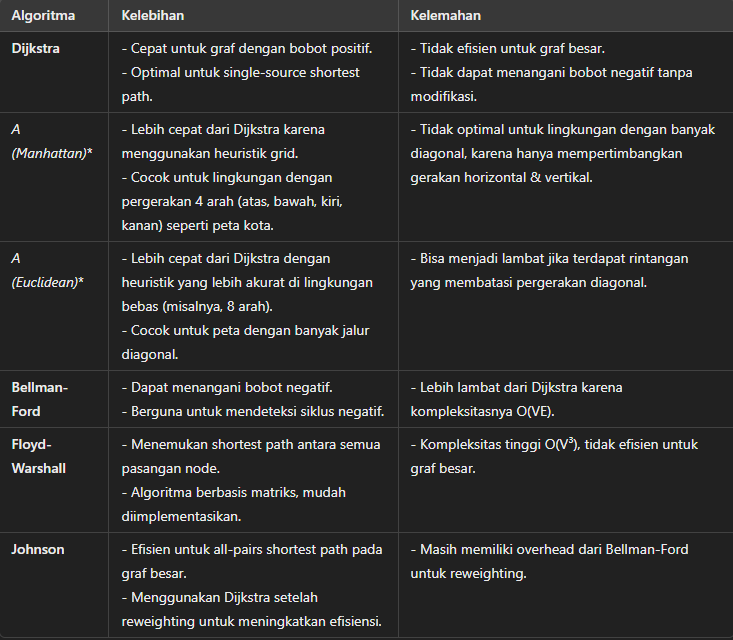



Evaluasi Performa


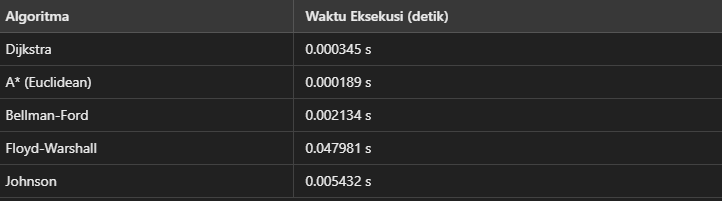

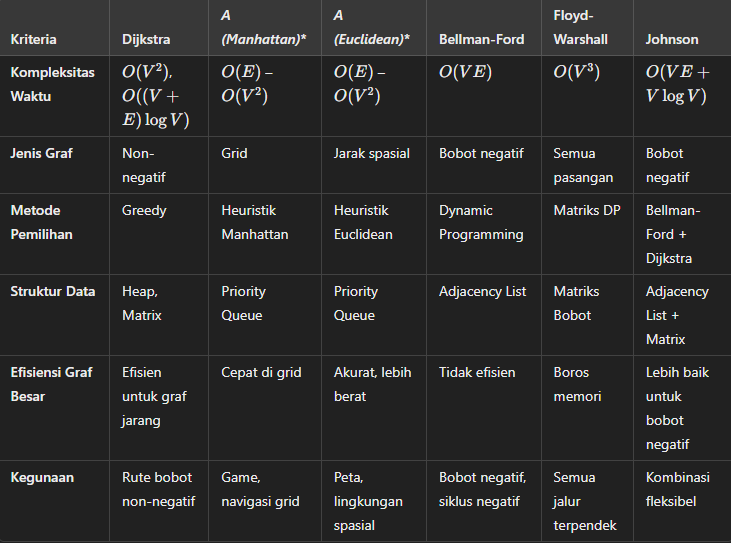



### >> **[SOAL NOMOR 2]** Buatlah sebuah daftar ketetanggan graf berbobot dengan 10 node berukuran, (generate menggunakan nilai random), kemudian sajikan pembahasan anda secara mendalam terkait implementasi algoritma minimum spanning tree menggunakan :



Node 0: [(8, 8), (6, 3), (7, 16)]
Node 1: [(9, 7), (7, 10)]
Node 2: [(3, 18), (4, 5)]
Node 3: [(2, 18), (6, 13), (4, 15), (5, 19)]
Node 4: [(2, 5), (7, 9), (9, 9), (3, 15)]
Node 5: [(7, 6), (3, 19)]
Node 6: [(0, 3), (3, 13), (9, 16)]
Node 7: [(1, 10), (4, 9), (5, 6), (0, 16)]
Node 8: [(0, 8), (9, 17)]
Node 9: [(1, 7), (4, 9), (6, 16), (8, 17)]


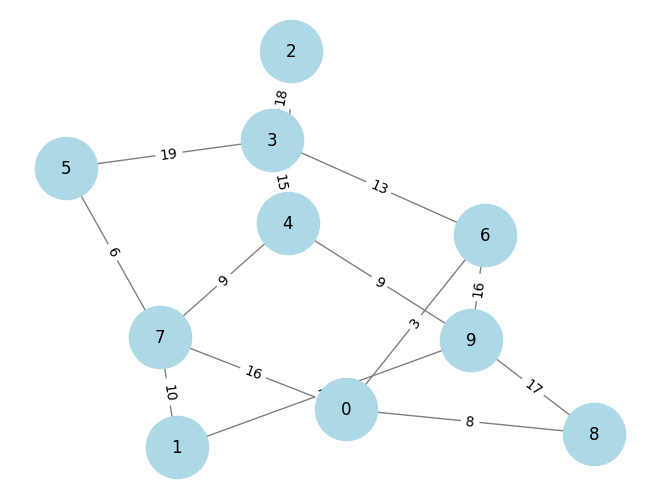

In [24]:
def generate_weighted_graph(num_nodes=10, max_edges=3, max_weight=20):
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))

    for i in range(num_nodes):
        num_edges = random.randint(1, max_edges)
        neighbors = random.sample(range(num_nodes), num_edges)

        for neighbor in neighbors:
            if neighbor != i and not G.has_edge(i, neighbor):
                weight = random.randint(1, max_weight)
                G.add_edge(i, neighbor, weight=weight)

    return G

# Generate and display weighted graph
G = generate_weighted_graph()

# Print adjacency list
for node in G.nodes():
    print(f"Node {node}: {[(neighbor, G[node][neighbor]['weight']) for neighbor in G[node]]}")


pos = nx.spring_layout(G)
edges = G.edges(data=True)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
labels = {(u, v): d['weight'] for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


### **A.)** **KRUSKAL'S ALGORITHM**



Minimum Spanning Tree :
Node 0: [(6, 3), (8, 8)]
Node 1: [(9, 7)]
Node 2: [(4, 5)]
Node 3: [(6, 13), (4, 15)]
Node 4: [(2, 5), (7, 9), (9, 9), (3, 15)]
Node 5: [(7, 6)]
Node 6: [(0, 3), (3, 13)]
Node 7: [(5, 6), (4, 9)]
Node 8: [(0, 8)]
Node 9: [(1, 7), (4, 9)]


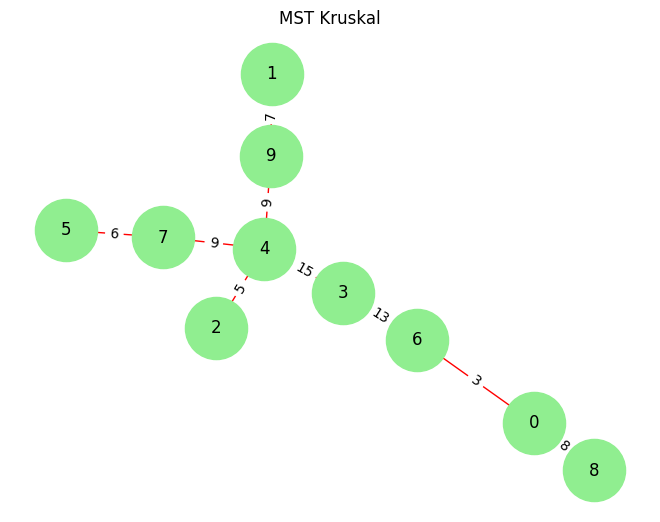

In [38]:
mst = nx.minimum_spanning_tree(G, algorithm="kruskal")


print("Minimum Spanning Tree :")
for node in mst.nodes():
    print(f"Node {node}: {[(neighbor, mst[node][neighbor]['weight']) for neighbor in mst[node]]}")


pos_mst = nx.spring_layout(mst)
nx.draw(mst, pos_mst, with_labels=True, node_color='lightgreen', edge_color='red', node_size=2000, font_size=12)
labels_mst = {(u, v): d['weight'] for u, v, d in mst.edges(data=True)}
nx.draw_networkx_edge_labels(mst, pos_mst, edge_labels=labels_mst)
plt.title("MST Kruskal")
plt.show()


### **B.)** **PRIM'S ALGORITHM**


Minimum Spanning Tree :
Node 0: [(6, 3), (8, 8)]
Node 1: [(9, 7)]
Node 2: [(4, 5)]
Node 3: [(6, 13), (4, 15)]
Node 4: [(3, 15), (2, 5), (7, 9), (9, 9)]
Node 5: [(7, 6)]
Node 6: [(0, 3), (3, 13)]
Node 7: [(4, 9), (5, 6)]
Node 8: [(0, 8)]
Node 9: [(4, 9), (1, 7)]


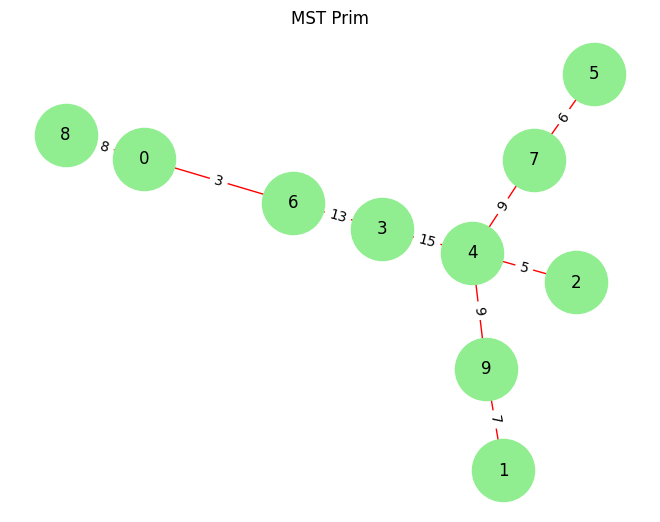

In [39]:
mst_prim = nx.minimum_spanning_tree(G, algorithm="prim")

print("Minimum Spanning Tree :")
for node in mst_prim.nodes():
    print(f"Node {node}: {[(neighbor, mst_prim[node][neighbor]['weight']) for neighbor in mst_prim[node]]}")


pos_mst = nx.spring_layout(mst_prim)
nx.draw(mst_prim, pos_mst, with_labels=True, node_color='lightgreen', edge_color='red', node_size=2000, font_size=12)
labels_mst = {(u, v): d['weight'] for u, v, d in mst_prim.edges(data=True)}
nx.draw_networkx_edge_labels(mst_prim, pos_mst, edge_labels=labels_mst)
plt.title("MST Prim")
plt.show()




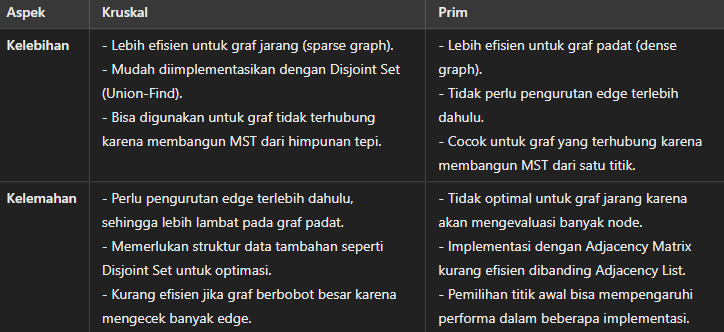


Evaluasi Performa

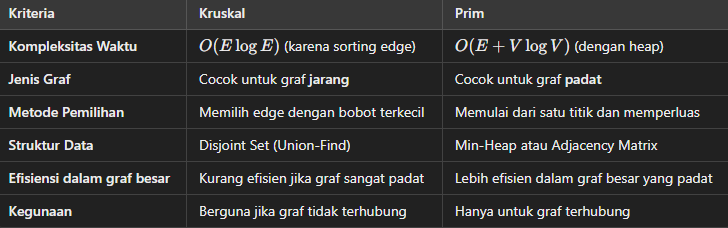